In [43]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import time

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = list(zip(x, y))

In [4]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

609

In [96]:
# Import the requests library.
import requests

# Import the API key.
from Config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ee9f372996f842aba60e803cacce7764


In [9]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ee9f372996f842aba60e803cacce7764&q=Boston


In [10]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [11]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather



<Response [200]>

In [12]:
# Get the text of the 'Get' request.
city_weather.text

'{"coord":{"lon":-71.06,"lat":42.36},"weather":[{"id":801,"main":"Clouds","description":"few clouds","icon":"02d"}],"base":"stations","main":{"temp":84.33,"feels_like":76.86,"temp_min":82,"temp_max":87.01,"pressure":1010,"humidity":37},"visibility":10000,"wind":{"speed":16.11,"deg":270,"gust":19.46},"clouds":{"all":20},"dt":1599244483,"sys":{"type":1,"id":3486,"country":"US","sunrise":1599214395,"sunset":1599261202},"timezone":-14400,"id":4930956,"name":"Boston","cod":200}'

In [13]:
#Get the JSON text of the 'Get' request.
city_weather.json()

{'coord': {'lon': -71.06, 'lat': 42.36},
 'weather': [{'id': 801,
   'main': 'Clouds',
   'description': 'few clouds',
   'icon': '02d'}],
 'base': 'stations',
 'main': {'temp': 84.33,
  'feels_like': 76.86,
  'temp_min': 82,
  'temp_max': 87.01,
  'pressure': 1010,
  'humidity': 37},
 'visibility': 10000,
 'wind': {'speed': 16.11, 'deg': 270, 'gust': 19.46},
 'clouds': {'all': 20},
 'dt': 1599244483,
 'sys': {'type': 1,
  'id': 3486,
  'country': 'US',
  'sunrise': 1599214395,
  'sunset': 1599261202},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [14]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [15]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.06, 'lat': 42.36},
 'weather': [{'id': 801,
   'main': 'Clouds',
   'description': 'few clouds',
   'icon': '02d'}],
 'base': 'stations',
 'main': {'temp': 84.33,
  'feels_like': 76.86,
  'temp_min': 82,
  'temp_max': 87.01,
  'pressure': 1010,
  'humidity': 37},
 'visibility': 10000,
 'wind': {'speed': 16.11, 'deg': 270, 'gust': 19.46},
 'clouds': {'all': 20},
 'dt': 1599244483,
 'sys': {'type': 1,
  'id': 3486,
  'country': 'US',
  'sunrise': 1599214395,
  'sunset': 1599261202},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [16]:
# Get the JSON data.
boston_data = city_weather.json()

In [17]:
boston_data["dt"]

1599244483

In [18]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.36 -71.06 87.01 37 20 16.11


In [19]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2020-09-04 18:34:43'

In [25]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + "i"
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
    # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
    # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
    # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
    # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | nizhneyansk
City not found. Skipping...
Processing Record 2 of Set 13 | hermanus
Processing Record 3 of Set 13 | lolua
City not found. Skipping...
Processing Record 4 of Set 13 | saint-augustin
Processing Record 5 of Set 13 | pevek
Processing Record 6 of Set 13 | wonthaggi
Processing Record 7 of Set 13 | provideniya
Processing Record 8 of Set 13 | nome
Processing Record 9 of Set 13 | busselton
Processing Record 10 of Set 13 | nicoya
Processing Record 11 of Set 13 | mkokotoni
Processing Record 12 of Set 13 | east london
Processing Record 13 of Set 13 | rikitea
Processing Record 14 of Set 13 | port alfred
Processing Record 15 of Set 13 | vaini
Processing Record 16 of Set 13 | mount gambier
Processing Record 17 of Set 13 | parabel
Processing Record 18 of Set 13 | phek
Processing Record 19 of Set 13 | bethel
Processing Record 20 of Set 13 | mahebourg
Processing Record 21 of Set 13 | hilo
Processing 

Processing Record 33 of Set 16 | hofn
Processing Record 34 of Set 16 | la ronge
Processing Record 35 of Set 16 | kashi
Processing Record 36 of Set 16 | hobyo
Processing Record 37 of Set 16 | upernavik
Processing Record 38 of Set 16 | tsihombe
City not found. Skipping...
Processing Record 39 of Set 16 | playa vicente
Processing Record 40 of Set 16 | luziania
Processing Record 41 of Set 16 | uray
Processing Record 42 of Set 16 | chapultepec
Processing Record 43 of Set 16 | chokurdakh
Processing Record 44 of Set 16 | matamoros
Processing Record 45 of Set 16 | gilazi
City not found. Skipping...
Processing Record 46 of Set 16 | dikson
Processing Record 47 of Set 16 | puerto colombia
Processing Record 48 of Set 16 | alugan
Processing Record 49 of Set 16 | manavalakurichi
Processing Record 50 of Set 16 | geraldton
Processing Record 1 of Set 17 | grand river south east
City not found. Skipping...
Processing Record 2 of Set 17 | vilhena
Processing Record 3 of Set 17 | sirnak
Processing Record 4

Processing Record 17 of Set 20 | nouadhibou
Processing Record 18 of Set 20 | toliary
City not found. Skipping...
Processing Record 19 of Set 20 | saint-pierre
Processing Record 20 of Set 20 | la tuque
Processing Record 21 of Set 20 | batticaloa
Processing Record 22 of Set 20 | bahia blanca
Processing Record 23 of Set 20 | zyryanka
Processing Record 24 of Set 20 | stornoway
Processing Record 25 of Set 20 | quatre cocos
Processing Record 26 of Set 20 | hervey bay
Processing Record 27 of Set 20 | podosinovets
Processing Record 28 of Set 20 | nguiu
City not found. Skipping...
Processing Record 29 of Set 20 | rockport
Processing Record 30 of Set 20 | byron bay
Processing Record 31 of Set 20 | poso
Processing Record 32 of Set 20 | sept-iles
Processing Record 33 of Set 20 | neryungri
Processing Record 34 of Set 20 | hauterive
Processing Record 35 of Set 20 | wau
Processing Record 36 of Set 20 | weiser
Processing Record 37 of Set 20 | noumea
Processing Record 38 of Set 20 | saint-louis
Process

Processing Record 4 of Set 24 | ilulissat
Processing Record 5 of Set 24 | sabla
Processing Record 6 of Set 24 | huarmey
Processing Record 7 of Set 24 | san juan
Processing Record 8 of Set 24 | utiroa
City not found. Skipping...
Processing Record 9 of Set 24 | whitianga
Processing Record 10 of Set 24 | temaraia
City not found. Skipping...
Processing Record 11 of Set 24 | manjakandriana
Processing Record 12 of Set 24 | oriximina
Processing Record 13 of Set 24 | viedma
Processing Record 14 of Set 24 | necochea
Processing Record 15 of Set 24 | daru
Processing Record 16 of Set 24 | visegrad
Processing Record 17 of Set 24 | caibarien
Processing Record 18 of Set 24 | zhezkazgan
Processing Record 19 of Set 24 | comodoro rivadavia
Processing Record 20 of Set 24 | zhanakorgan
Processing Record 21 of Set 24 | cradock
Processing Record 22 of Set 24 | gorontalo
Processing Record 23 of Set 24 | belle fourche
Processing Record 24 of Set 24 | bilma
Processing Record 25 of Set 24 | bairiki
Processing R

In [26]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hermanus,-34.42,19.23,57.00,80,1,13.42,ZA,2020-09-04 18:36:38
1,Saint-Augustin,51.23,-58.65,63.52,93,100,19.80,CA,2020-09-04 18:36:38
2,Pevek,69.70,170.31,34.75,88,86,4.61,RU,2020-09-04 18:36:38
3,Wonthaggi,-38.60,145.59,52.00,87,10,15.64,AU,2020-09-04 18:36:38
4,Provideniya,64.38,-173.30,41.05,69,10,3.22,RU,2020-09-04 18:36:39
5,Nome,64.50,-165.41,43.00,87,90,4.70,US,2020-09-04 18:36:29
6,Busselton,-33.65,115.33,57.99,87,93,11.72,AU,2020-09-04 18:36:39
7,Nicoya,10.15,-85.45,87.80,66,75,6.93,CR,2020-09-04 18:36:39
8,Mkokotoni,-5.88,39.25,77.00,83,20,12.75,TZ,2020-09-04 18:36:39
9,East London,-33.02,27.91,66.20,82,0,11.41,ZA,2020-09-04 18:36:40


In [39]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hermanus,ZA,2020-09-04 18:36:38,-34.42,19.23,57.00,80,1,13.42
1,Saint-Augustin,CA,2020-09-04 18:36:38,51.23,-58.65,63.52,93,100,19.80
2,Pevek,RU,2020-09-04 18:36:38,69.70,170.31,34.75,88,86,4.61
3,Wonthaggi,AU,2020-09-04 18:36:38,-38.60,145.59,52.00,87,10,15.64
4,Provideniya,RU,2020-09-04 18:36:39,64.38,-173.30,41.05,69,10,3.22
5,Nome,US,2020-09-04 18:36:29,64.50,-165.41,43.00,87,90,4.70
6,Busselton,AU,2020-09-04 18:36:39,-33.65,115.33,57.99,87,93,11.72
7,Nicoya,CR,2020-09-04 18:36:39,10.15,-85.45,87.80,66,75,6.93
8,Mkokotoni,TZ,2020-09-04 18:36:39,-5.88,39.25,77.00,83,20,12.75
9,East London,ZA,2020-09-04 18:36:40,-33.02,27.91,66.20,82,0,11.41


In [40]:
# Create the output file (CSV).
output_data_file = "cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [41]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

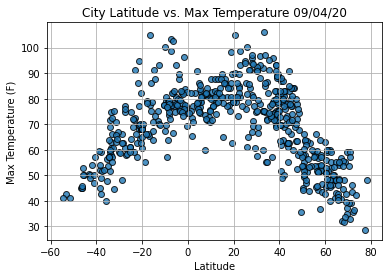

In [45]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Fig1.png")

# Show plot.
plt.show()

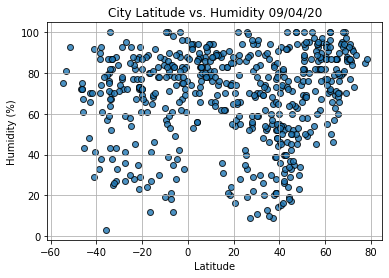

In [46]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Fig2.png")
# Show plot.
plt.show()

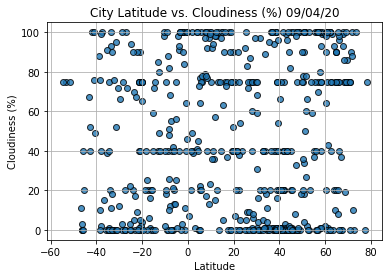

In [47]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Fig3.png")
# Show plot.
plt.show()

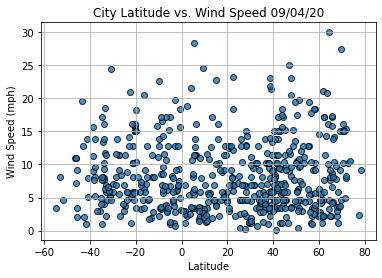

In [48]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Fig4.png")
# Show plot.
plt.show()

In [50]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [53]:
index13 = city_data_df.loc[13]
index13

City                Mount Gambier
Country                        AU
Date          2020-09-04 18:36:41
Lat                        -37.83
Lng                        140.77
Max Temp                     42.8
Humidity                       93
Cloudiness                      2
Wind Speed                   8.05
Name: 13, dtype: object

In [54]:
city_data_df["Lat"] >= 0

0      False
1       True
2       True
3      False
4       True
       ...  
556     True
557    False
558     True
559    False
560     True
Name: Lat, Length: 561, dtype: bool

In [56]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head(5)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Saint-Augustin,CA,2020-09-04 18:36:38,51.23,-58.65,63.52,93,100,19.80
2,Pevek,RU,2020-09-04 18:36:38,69.70,170.31,34.75,88,86,4.61
4,Provideniya,RU,2020-09-04 18:36:39,64.38,-173.30,41.05,69,10,3.22
5,Nome,US,2020-09-04 18:36:29,64.50,-165.41,43.00,87,90,4.70
7,Nicoya,CR,2020-09-04 18:36:39,10.15,-85.45,87.80,66,75,6.93


In [57]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [80]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n
                       for Maximum Temperature', 'Max Temp',(10,40))

SyntaxError: EOL while scanning string literal (<ipython-input-80-977cc754848a>, line 6)

In [90]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n
                        for Maximum Temperature, 'Max Temp',(-50,90)

SyntaxError: EOL while scanning string literal (<ipython-input-90-b3ec33357625>, line 6)

In [91]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n
                        for % Humidity', '% Humidity',(40,10))

SyntaxError: EOL while scanning string literal (<ipython-input-91-1d3c2bd0b2d6>, line 6)

In [92]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n
                        for % Humidity', '% Humidity',(-50,15))

SyntaxError: EOL while scanning string literal (<ipython-input-92-9c3e8b244753>, line 6)

In [93]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n
                        for % Cloudiness', '% Cloudiness',(-50,60))

SyntaxError: EOL while scanning string literal (<ipython-input-93-3dc99b339452>, line 6)

In [94]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n
                        for Wind Speed', 'Wind Speed',(40,35))

SyntaxError: EOL while scanning string literal (<ipython-input-94-7024af74f12d>, line 6)

In [95]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n
                        for Wind Speed', 'Wind Speed',(-50,35))

SyntaxError: EOL while scanning string literal (<ipython-input-95-8c4f0e57bb27>, line 6)